In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_idx = ((np.argmax(mnist.train.labels, 1) == 1) | \
             (np.argmax(mnist.train.labels, 1) == 5) | \
             (np.argmax(mnist.train.labels, 1) == 6))
test_idx = ((np.argmax(mnist.test.labels, 1) == 1) | \
            (np.argmax(mnist.test.labels, 1) == 5) | \
            (np.argmax(mnist.test.labels, 1) == 6))

train_imgs   = mnist.train.images[train_idx]
train_labels = mnist.train.labels[train_idx]
test_imgs    = mnist.test.images[test_idx]
test_labels  = mnist.test.labels[test_idx]
n_train      = train_imgs.shape[0]
n_test       = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)


In [4]:
# Shape of input and latent variable

n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

In [24]:
weights={'encoder1':tf.Variable(tf.random_normal([n_input,n_encoder1],stddev=0.1)),
         'encoder2':tf.Variable(tf.random_normal([n_encoder1,n_encoder2],stddev=0.1)),
         'latent':tf.Variable(tf.random_normal([n_encoder2,n_latent],stddev=0.1)),
         'decoder2':tf.Variable(tf.random_normal([n_latent,n_decoder2],stddev=0.1)),
         'decoder1':tf.Variable(tf.random_normal([n_decoder2,n_decoder1],stddev=0.1)),
         'reconst':tf.Variable(tf.random_normal([n_decoder1,n_input],stddev=0.1))
        }

bias={'encoder1':tf.Variable(tf.random_normal([n_encoder1],stddev=0.1)),
      'encoder2':tf.Variable(tf.random_normal([n_encoder2],stddev=0.1)),
      'latent':tf.Variable(tf.random_normal([n_latent],stddev=0.1)),
      'decoder2':tf.Variable(tf.random_normal([n_decoder2],stddev=0.1)),
      'decoder1':tf.Variable(tf.random_normal([n_decoder1],stddev=0.1)),
      'reconst':tf.Variable(tf.random_normal([n_input],stddev=0.1))
     }

In [25]:
def encoder(x,weights,bias):
    encoder1=tf.add(tf.matmul(x,weights['encoder1']),bias['encoder1'])
    encoder1=tf.nn.tanh(encoder1)
    
    encoder2=tf.add(tf.matmul(encoder1,weights['encoder2']),bias['encoder2'])
    encoder2=tf.nn.tanh(encoder2)
    
    latent=tf.add(tf.matmul(encoder2,weights['latent']),bias['latent'])
    return latent

def decoder(latent,weights,bias):
    decoder2=tf.add(tf.matmul(latent,weights['decoder2']),bias['decoder2'])
    decoder2=tf.nn.tanh(decoder2)
    
    decoder1=tf.add(tf.matmul(decoder2,weights['decoder1']),bias['decoder1'])
    decoder1=tf.nn.tanh(decoder1)
    
    reconst=tf.add(tf.matmul(decoder1,weights['reconst']),bias['reconst'])
    
    return reconst

In [26]:
x=tf.placeholder(tf.float32,[None,n_input])
latent=encoder(x,weights,bias)
reconst=decoder(latent,weights,bias)
loss=tf.square(reconst-x)
loss=tf.reduce_mean(loss)

opt=tf.train.AdamOptimizer(0.0001).minimize(loss)
init=tf.global_variables_initializer()
sess=tf.Session()

sess.run(init)
for i in range(10000):
    train_x,_=mnist.train.next_batch(50)
    _,l=sess.run([opt,loss],feed_dict={x:train_x})
    print(l)


0.78205794
0.7001698
0.589346
0.47955886
0.44824165
0.4429549
0.38718042
0.39023948
0.3865007
0.3800334
0.4309424
0.38408518
0.34906635
0.34280747
0.32916924
0.30722147
0.28959233
0.29966566
0.30248302
0.256988
0.26056284
0.2645569
0.25421262
0.23881435
0.2506929
0.2512986
0.2372708
0.2214806
0.21552655
0.20786104
0.20180929
0.18634985
0.19570322
0.20372032
0.18234542
0.17922835
0.17359126
0.18135422
0.1705696
0.1566477
0.16341911
0.15489335
0.15421419
0.16458862
0.14637698
0.14965217
0.14904721
0.15101647
0.1431307
0.14474544
0.1314981
0.14180638
0.13096696
0.13338818
0.13608946
0.13344885
0.12092218
0.1306634
0.1197045
0.123569906
0.113458365
0.11844519
0.11590078
0.11566405
0.11609704
0.11977324
0.114889264
0.10745315
0.116886064
0.108914085
0.10542338
0.10092951
0.10294315
0.0974937
0.09812397
0.106873356
0.104425654
0.09437012
0.10801175
0.097624384
0.09569498
0.08929072
0.09733229
0.0997334
0.086907744
0.09024319
0.08827728
0.09480772
0.08532761
0.09321018
0.08896561
0.08849395
0

0.05781763
0.0616262
0.05913649
0.059366286
0.055488717
0.05545933
0.055770826
0.058344845
0.058779635
0.060899068
0.05531944
0.05746814
0.05529711
0.058814697
0.05920514
0.05822846
0.056930654
0.057332944
0.062055167
0.062798366
0.055867903
0.057812545
0.057261914
0.059590068
0.05430608
0.0594855
0.05331952
0.055709396
0.05376278
0.055071205
0.058886506
0.05998572
0.05681146
0.05784876
0.056174975
0.054375324
0.05695621
0.062466636
0.05386183
0.057685025
0.057826675
0.060264107
0.056840345
0.058272693
0.060076207
0.053517878
0.056311477
0.059490755
0.05384111
0.057048284
0.05757968
0.057500403
0.05193389
0.059547946
0.05450171
0.057583407
0.057675693
0.060131773
0.056015655
0.05863074
0.05618511
0.05516882
0.056566063
0.053850703
0.054607738
0.05972389
0.05416426
0.05754275
0.059817113
0.058107
0.06030302
0.05812842
0.05965874
0.058248267
0.05662835
0.054783676
0.052454274
0.057310373
0.0583878
0.05553846
0.053447615
0.05933011
0.060313236
0.057345025
0.052806005
0.054102223
0.0597398

0.054332953
0.050479837
0.058440737
0.057695836
0.05416441
0.053242385
0.054100122
0.05340757
0.052860875
0.056716796
0.05912626
0.055513173
0.051648553
0.056005847
0.055634085
0.05542325
0.056723047
0.0609072
0.060728174
0.058145676
0.061082862
0.056088686
0.0546249
0.059426125
0.058195513
0.054364704
0.05538814
0.053555224
0.056075003
0.059922997
0.058307238
0.05677061
0.052924767
0.053605128
0.05722303
0.05431596
0.059386298
0.059786227
0.055649675
0.055655193
0.060115818
0.058445066
0.053523533
0.057420805
0.057724983
0.05339629
0.061319947
0.05768361
0.05788492
0.055366684
0.057263568
0.05911027
0.05592708
0.061545085
0.05555309
0.060436588
0.056122236
0.059341174
0.059448216
0.054241158
0.053991843
0.05920283
0.055318587
0.054038536
0.056155067
0.052642923
0.05494687
0.0593825
0.05685348
0.059132006
0.05491453
0.054627474
0.058815207
0.053434562
0.058578253
0.054633304
0.06023637
0.056399323
0.058657438
0.059392564
0.05332549
0.05676785
0.054694265
0.06260349
0.060367607
0.059186

0.053281743
0.055084996
0.05843141
0.055366885
0.05504643
0.05672314
0.05472041
0.05739992
0.054864276
0.0517355
0.052023068
0.05724546
0.056874476
0.051196773
0.055170514
0.056598835
0.05405159
0.054924317
0.057417914
0.0566473
0.056010548
0.055820674
0.055127658
0.056329347
0.05791124
0.048131876
0.054388102
0.049577296
0.05591956
0.053666785
0.05802413
0.05929644
0.056751087
0.055289853
0.053173643
0.053408403
0.05374863
0.059439722
0.056554567
0.051240537
0.057666488
0.05639666
0.0577668
0.056333233
0.055433437
0.053980425
0.05761142
0.051596858
0.05149616
0.060802594
0.055447526
0.05387437
0.05243671
0.053562872
0.05789101
0.054649115
0.057834815
0.058357257
0.05073197
0.05519319
0.057595707
0.056093387
0.056448724
0.056188006
0.052210607
0.052825652
0.05258731
0.051259454
0.0561877
0.05286137
0.05970232
0.058151968
0.05823708
0.054728642
0.0530972
0.054557107
0.05483401
0.052489467
0.05374285
0.058051087
0.051407203
0.05695886
0.052610114
0.058127802
0.057336275
0.056241747
0.054

0.051893294
0.04861347
0.05448206
0.055325173
0.05417279
0.054329634
0.052697778
0.052972738
0.057204142
0.05408628
0.049172524
0.05235959
0.053631686
0.05630568
0.05059106
0.052548394
0.05288918
0.047497448
0.05676684
0.05112053
0.05221218
0.058417663
0.053244323
0.052522644
0.05961827
0.05683355
0.055783696
0.054104503
0.048646856
0.053173896
0.047075823
0.054965526
0.05749416
0.0513284
0.046457116
0.052619297
0.053005002
0.051849365
0.05152015
0.05101107
0.054516796
0.056739092
0.05324232
0.05325969
0.04969488
0.04939755
0.05471224
0.055463918
0.05155289
0.051397998
0.049604118
0.054102685
0.04970213
0.05677864
0.050387304
0.05504672
0.052276947
0.05301058
0.051647656
0.05276336
0.056968864
0.048522983
0.053458203
0.048576854
0.051493313
0.04766972
0.0580704
0.052542333
0.056928977
0.049924623
0.050032698
0.05107427
0.04993822
0.048693847
0.053032506
0.051030517
0.052940313
0.05541131
0.05238754
0.054950763
0.048371963
0.053032257
0.051274296
0.05448295
0.05441276
0.04931763
0.05125

0.051067617
0.050513312
0.051938128
0.052949183
0.05139312
0.05272795
0.052984595
0.047592003
0.053400643
0.04968542
0.05130713
0.048838127
0.052008566
0.0506348
0.049867515
0.05732464
0.051611748
0.050636604
0.051140036
0.04991584
0.04878994
0.052196164
0.05178591
0.050049126
0.053641208
0.0506672
0.04776556
0.049878143
0.050009586
0.053359557
0.0479231
0.052934308
0.049558908
0.050128587
0.047818124
0.048651796
0.047344916
0.046191525
0.047970984
0.04968969
0.04833866
0.054559536
0.05133177
0.051122546
0.050361875
0.048655882
0.05204047
0.050392043
0.05089572
0.05273187
0.048922572
0.050205532
0.048116576
0.05162222
0.052798625
0.049776115
0.050942287
0.052297574
0.053320274
0.05035447
0.0518129
0.049839202
0.052541703
0.051439945
0.049616016
0.055199075
0.05115608
0.05010191
0.050183024
0.05438177
0.049755275
0.054373167
0.048456088
0.048879184
0.051793735
0.05121837
0.046200927
0.05796063
0.051215395
0.04943627
0.05375761
0.053370275
0.046672326
0.049787063
0.05724245
0.051435273
0

0.05272522
0.051864427
0.046344094
0.050047435
0.049380496
0.04619184
0.05411387
0.049232278
0.048245095
0.050270796
0.05317964
0.052830145
0.04668928
0.050783023
0.05269708
0.05360333
0.050229866
0.045237664
0.0471657
0.05079267
0.053788703
0.051439956
0.049279634
0.051751494
0.048991382
0.04915241
0.05344582
0.053207316
0.053400375
0.04926525
0.045849815
0.04842368
0.049847476
0.051069435
0.050986547
0.04825481
0.0554785
0.052013848
0.047976933
0.051376674
0.050656386
0.048185315
0.047412977
0.04746285
0.047498766
0.045378864
0.04856764
0.051875584
0.05412853
0.04612108
0.046923026
0.048806433
0.04518094
0.05101709
0.0537132
0.047258485
0.04826657
0.054428034
0.048596915
0.049918056
0.047237836
0.04996425
0.053756814
0.05387737
0.047491092
0.05135492
0.053556886
0.050821327
0.049302705
0.049420033
0.048020937
0.047868416
0.05155407
0.055367395
0.04969518
0.053334612
0.047348715
0.047460247
0.05098105
0.051191512
0.04667568
0.05078093
0.048370678
0.04861719
0.052374728
0.049332924
0.0

0.04944889
0.052656133
0.045197107
0.04788023
0.047670677
0.051396564
0.047466747
0.046272848
0.046189867
0.047838364
0.045507476
0.048963908
0.047890235
0.046915546
0.04858871
0.051304094
0.050373655
0.05107478
0.051122822
0.048666548
0.04952757
0.051460978
0.049082246
0.047167525
0.05319052
0.04352033
0.048491474
0.051599357
0.05385371
0.05059575
0.051765937
0.05209753
0.045767836
0.04534581
0.04894028
0.054282244
0.052949432
0.04793751
0.047152705
0.048178364
0.049418632
0.05148574
0.05077181
0.049128387
0.047378726
0.049677808
0.048280716
0.04523047
0.052945755
0.046453185
0.051529866
0.046632208
0.050201107
0.04822117
0.047554154
0.048664637
0.04803847
0.050660636
0.046266727
0.054293163
0.047686663
0.043508008
0.051121153
0.047831547
0.050423738
0.047819432
0.044289205
0.04827513
0.047335204
0.047604047
0.048570108
0.04772125
0.048888806
0.047652986
0.048833724
0.052628882
0.04640927
0.05068645
0.04854562
0.051983614
0.05027005
0.050409224
0.05251514
0.05045347
0.04903448
0.04934

0.048284225
0.046019055
0.043408476
0.046630245
0.051197655
0.04852093
0.04970937
0.04487902
0.04854009
0.050072845
0.04789077
0.04710635
0.04865006
0.046798963
0.04978998
0.048307247
0.049809054
0.05194558
0.049186926
0.046668693
0.049080476
0.04896466
0.04590725
0.048991866
0.054832865
0.05032798
0.04750043
0.04612822
0.046921752
0.047119495
0.049288973
0.04705258
0.05188917
0.050975602
0.047676545
0.04723043
0.045849074
0.049832586
0.04963947
0.04708297
0.04746173
0.046555966
0.050913524
0.049958266
0.050432272
0.051791947
0.050653286
0.050097
0.046355914
0.053615298
0.043959554
0.04762367
0.048844624
0.04949456
0.049461644
0.05271258
0.045726262
0.047053922
0.05091662
0.050135836
0.05197253
0.044620696
0.05058713
0.049348287
0.04102237
0.048535697
0.050247516
0.04706821
0.049742807
0.0498827
0.04633985
0.053068217
0.053395517
0.047923442
0.054257512
0.04816876
0.045322314
0.045583185
0.047100756
0.05079752
0.04704272
0.05033488
0.046624023
0.046639044
0.051880684
0.047680296
0.0500

0.04893191
0.049279742
0.04803739
0.051583674
0.04858778
0.052320383
0.051069725
0.047917224
0.047137994
0.04845361
0.051230848
0.047175374
0.051314946
0.049100634
0.044150174
0.050309643
0.046533503
0.0475428
0.048553977
0.0440584
0.048027713
0.05118844
0.047388542
0.04698499
0.048707444
0.046922714
0.04740714
0.052008376
0.04960496
0.04968164
0.046729863
0.048351917
0.048369113
0.052012954
0.04517723
0.045352224
0.050356682
0.04846475
0.05123531
0.04599473
0.046921857
0.04970557
0.050356854
0.05109273
0.048408262
0.053756714
0.046734553
0.045855854
0.04335447
0.047247186
0.04859443
0.046459544
0.04715016
0.048635103
0.04874297
0.04779003
0.042879306
0.047172662
0.04812775
0.046338145
0.04705778
0.047114026
0.0490112
0.04893977
0.04706362
0.048504714
0.046240192
0.042474635
0.04665923
0.049226705
0.049954988
0.044219043
0.04591367
0.04791726
0.046378262
0.05198534
0.04956063
0.050626177
0.05016514
0.041156992
0.049049042
0.05050714
0.05331952
0.04918816
0.051820386
0.04584228
0.048308

0.047904152
0.044830035
0.045405902
0.04703725
0.047108877
0.05286936
0.049945727
0.05339311
0.04682322
0.047674615
0.050521832
0.049580507
0.05015892
0.050452057
0.04840705
0.047414437
0.04979704
0.048529115
0.04359659
0.047887698
0.045484085
0.045280196
0.046758235
0.04769929
0.051975098
0.04723218
0.047878716
0.051155943
0.046883475
0.04555099
0.044649217
0.046317257
0.048664235
0.05179725
0.05157611
0.045260362
0.04463237
0.043497343
0.04367156
0.05130324
0.045347266
0.04876679
0.043612875
0.048134748
0.046686158
0.04659443
0.049240172
0.04995734
0.050643858
0.048029657
0.04476011
0.045300573
0.04694937
0.04787691
0.04846151
0.044510134
0.047081254
0.050965656
0.044904474
0.049353838
0.047478825
0.047504447
0.050415426
0.046214793
0.048860114
0.050031435
0.04507935
0.049101353
0.04852564
0.04768285
0.045735188
0.049482565
0.047502596
0.04871227
0.046228148
0.050984465
0.052071605
0.050222255
0.050209742
0.046082515
0.04862669
0.048433222
0.04716627
0.04893821
0.04502772
0.041726135

0.047423474
0.04593169
0.050362717
0.044852156
0.048623852
0.041971013
0.0486171
0.0490486
0.0480952
0.043915335
0.049928654
0.046789065
0.04931313
0.04645932
0.04245706
0.044818047
0.04530307
0.04660758
0.04651899
0.045351774
0.04720137
0.046353
0.046151236
0.049624447
0.04914932
0.04873034
0.045243412
0.045944743
0.049586423
0.04612995
0.04630092
0.049865503
0.04377194
0.048750054
0.05349975
0.048594434
0.04874817
0.045567993
0.050122056
0.048844047
0.05304944
0.050012056
0.048419524
0.04613586
0.047590178
0.048429687
0.04738569
0.05038677
0.050508652
0.04591775
0.04914385
0.043994434
0.05056233
0.047863547
0.047686443
0.04721038
0.04925626
0.0541375
0.04968702
0.051101074
0.04572759
0.046229962
0.045773707
0.051167604
0.051794566
0.048880592
0.04706784
0.05153988
0.051960643
0.04578225
0.04634671
0.04788961
0.04790587
0.048264146
0.047065288
0.04238276
0.045776855
0.047274686
0.043699756
0.050895244
0.047465395
0.047549557
0.049540818
0.04784497
0.045015033
0.045166004
0.04656773
0.

0.04712337
0.048152305
0.045692306
0.047942575
0.048620332
0.043099746
0.045040917
0.044280972
0.049356677
0.04937278
0.04664085
0.045504674
0.04595362
0.047221955
0.044963285
0.04578817
0.045631733
0.04617532
0.049107518
0.048086964
0.04715547
0.04772264
0.044976525
0.050807655
0.051686842
0.048608325
0.049860273
0.049923446
0.04517451
0.049203284
0.04756951
0.051040944
0.04646224
0.047083527
0.044844005
0.044885073
0.046647646
0.051347867
0.04456573
0.045709673
0.04308905
0.046304077
0.04733572
0.04588514
0.044178735
0.04755933
0.05222255
0.045514446
0.04848766
0.045754224
0.046365853
0.046812654
0.045871176
0.04664951
0.050140694
0.04582064
0.047230635
0.047189675
0.047055457
0.05207423
0.049189042
0.04591387
0.047250826
0.04689579
0.047284275
0.04717756
0.045842484
0.046163417
0.04918736
0.044800196
0.04781298
0.04661443
0.045872156
0.04628204
0.04877965
0.047201842
0.05010269
0.04463241
0.04004829
0.04418933
0.046337873
0.04563091
0.04916057
0.045534946
0.04583485
0.042687688
0.04

0.04671682
0.04560127
0.04685897
0.04815449
0.047616232
0.048803873
0.049290854
0.047650788
0.047536377
0.04997013
0.046708137
0.049882676
0.047056407
0.051649567
0.049433045
0.043961797
0.046642203
0.048194088
0.04932386
0.046881843
0.045388877
0.04622095
0.042638056
0.048861757
0.04789697
0.048757207
0.04406603
0.04805398
0.044686306
0.050334398
0.046659734
0.049352534
0.04656842
0.048332144
0.047354475
0.04787406
0.04517447
0.04296545
0.046345364
0.044561323
0.042919323
0.04876701
0.04515362
0.0440786
0.04515795
0.049361143
0.046750437
0.04933552
0.048278622
0.046684314
0.04495402
0.047273304
0.046213903
0.04185726
0.04535015
0.04481373
0.04722131
0.047813427
0.04768492
0.04556161
0.046195634
0.046283565
0.047928106
0.05106607
0.050059505
0.04910999
0.047573596
0.043801527
0.047008865
0.04252061
0.047678657
0.046015725
0.04156839
0.049738888
0.04450183
0.041883755
0.048664123
0.046257652
0.047583904
0.048067417
0.04304031
0.04521108
0.045871686
0.045869656
0.04562938
0.050214026
0.0

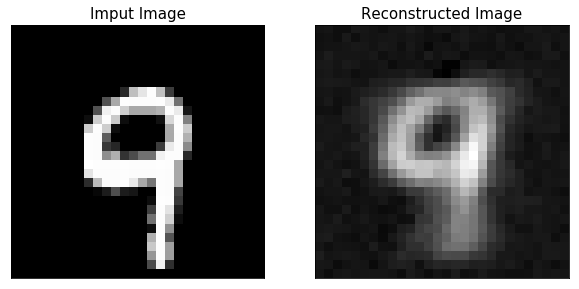

In [28]:
test_x,_=mnist.test.next_batch(1)
x_reconst=sess.run(reconst,feed_dict={x:test_x})
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x.reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

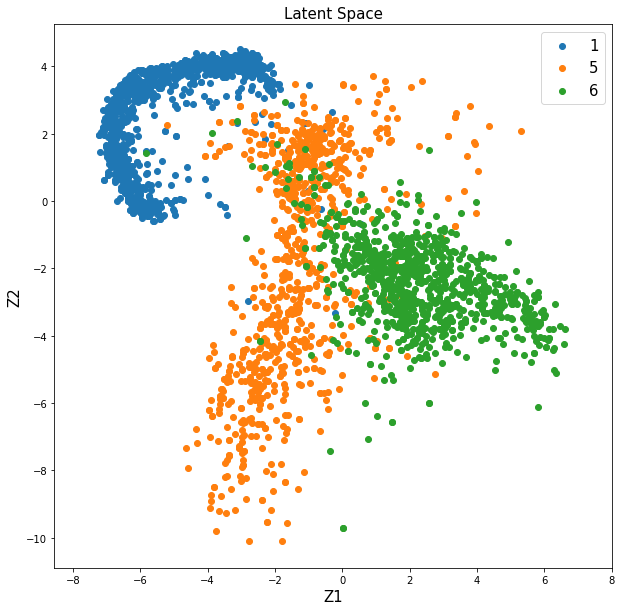

In [32]:
test_x,test_y=mnist.test.next_batch(10000)
test_y=np.argmax(test_y,axis=1)
test_latent=sess.run(latent,feed_dict={x:test_x})

plt.figure(figsize=(10,10))
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

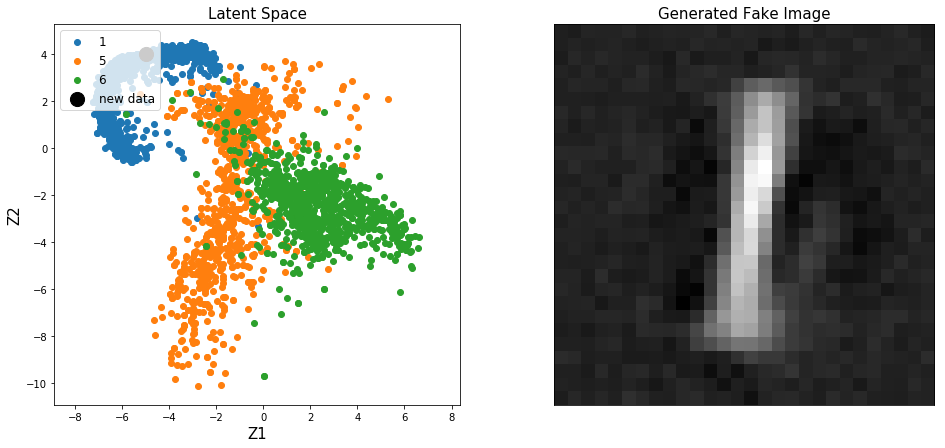

In [36]:
new_data = np.array([[-5, 4]])

latent_input = tf.placeholder(tf.float32, [None, n_latent])
reconst = decoder(latent_input, weights, bias)
fake_image = sess.run(reconst, feed_dict = {latent_input: new_data})

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.scatter(new_data[:,0], new_data[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()